<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/First_Example_of_a_CNN_(CIFAR10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First example of a CNN

(C) Umberto Michelucci

umberto.michelucci@toelt.ai

www.toelt.ai

In [ ]:
import numpy as np
np.object = object   
np.bool = bool   
np.int = int  
np.float = float    
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

from tensorflow.keras.datasets import cifar10

from tensorflow.keras import utils
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('classic')
#

In [88]:
#utils.set_random_seed(42)
tf.random.set_seed(42)

## Model

In [89]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [90]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [91]:
nClasses = 10
y_train = utils.to_categorical(y_train,nClasses)
y_test = utils.to_categorical(y_test,nClasses)

In [92]:
x_train.shape[1:]

(32, 32, 3)

In [93]:
def createModel():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [94]:
K.clear_session()
model = createModel()

In [95]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        9280      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [96]:
AdamOpt = Adam(learning_rate=0.001)
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [98]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8816435..2.0778248].


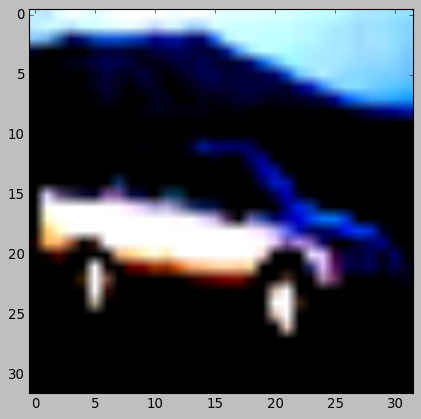

In [99]:
plt.imshow(x_train[4])

In [100]:
batch_size = 256
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_test, y_test))

Epoch 1/10
196/196 [==============================] - 27s 135ms/step - loss: 1.8268 - accuracy: 0.3107 - val_loss: 1.4725 - val_accuracy: 0.4583
Epoch 2/10
196/196 [==============================] - 27s 138ms/step - loss: 1.4451 - accuracy: 0.4654 - val_loss: 1.2755 - val_accuracy: 0.5364
Epoch 3/10
196/196 [==============================] - 27s 139ms/step - loss: 1.2809 - accuracy: 0.5350 - val_loss: 1.1962 - val_accuracy: 0.5719
Epoch 4/10
196/196 [==============================] - 27s 139ms/step - loss: 1.1709 - accuracy: 0.5800 - val_loss: 1.0932 - val_accuracy: 0.6136
Epoch 5/10
196/196 [==============================] - 28s 141ms/step - loss: 1.0812 - accuracy: 0.6145 - val_loss: 0.9572 - val_accuracy: 0.6597
Epoch 6/10
196/196 [==============================] - 23s 115ms/step - loss: 1.0061 - accuracy: 0.6435 - val_loss: 0.9664 - val_accuracy: 0.6534
Epoch 7/10
196/196 [==============================] - 26s 132ms/step - loss: 0.9406 - accuracy: 0.6664 - val_loss: 0.8529 - val_ac

In [101]:
history.history

{'loss': [1.8268189430236816,
  1.4451026916503906,
  1.280923843383789,
  1.1708848476409912,
  1.081228256225586,
  1.0061475038528442,
  0.9405633807182312,
  0.9008845090866089,
  0.8551494479179382,
  0.8239519596099854],
 'accuracy': [0.3107199966907501,
  0.46540001034736633,
  0.535040020942688,
  0.5799599885940552,
  0.6144800186157227,
  0.6435199975967407,
  0.6664400100708008,
  0.6828799843788147,
  0.701259970664978,
  0.7105399966239929],
 'val_loss': [1.4724782705307007,
  1.2754729986190796,
  1.1962186098098755,
  1.0931528806686401,
  0.957183301448822,
  0.9664017558097839,
  0.8528881072998047,
  0.832695484161377,
  0.815045952796936,
  0.7605551481246948],
 'val_accuracy': [0.45829999446868896,
  0.5364000201225281,
  0.5719000101089478,
  0.6136000156402588,
  0.6596999764442444,
  0.6534000039100647,
  0.7024000287055969,
  0.7099000215530396,
  0.7139999866485596,
  0.7347999811172485]}

Text(0, 0.5, 'Loss')

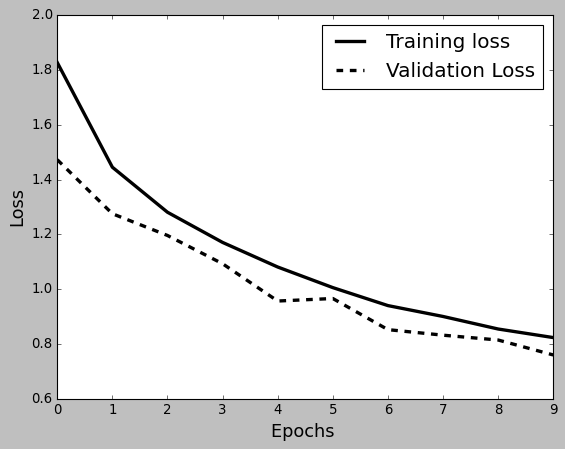

In [102]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)


Text(0, 0.5, 'Accuracy')

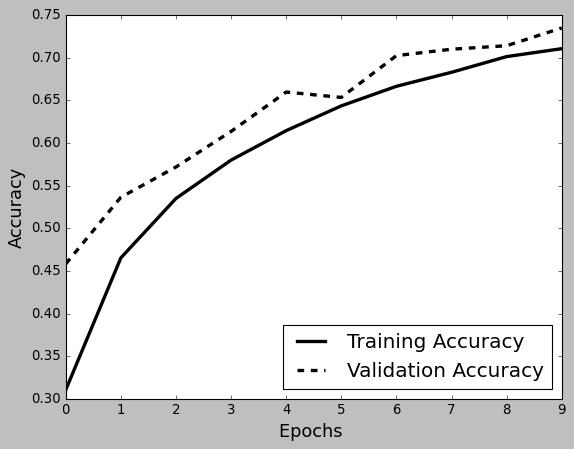

In [103]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'black',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)
